# Programming Assignment 4
* CSCI-4930/5930 ML Spring 2019
* Author: Shreya Dubey 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import metrics
sns.set()
from sklearn.model_selection import train_test_split
import warnings
import math
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

#Reading the csv file 
dataset = pd.read_csv("dataset.csv")

# Changing into numpy
dataset = dataset.values

# splitting into training and test set
train_set, test_set = train_test_split(dataset, test_size=0.20 )

# separating X and Y
X_train = train_set[:,0:55]
X_train = np.delete(X_train,0,1)
X_test = test_set[:,0:55]
X_test = np.delete(X_test,0,1)
Y_train = train_set[:,-1]
Y_test = test_set[:,-1]

# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Task 2

# Running Base classifier on the whole set
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=7)
model = clf.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)
Y_pred_train = model.predict(X_train)
acc_train = metrics.accuracy_score(Y_train,Y_pred_train)
acc_test = metrics.accuracy_score(Y_test,Y_pred_test)
print("accuracy = ",acc_train)
print("accuracy = ",acc_test)


accuracy =  0.7357804232804233
accuracy =  0.7222222222222222


C:\Users\khare\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [2]:
# Task 1 - running the dataset for number of rounds 1,2,---100

from sklearn.ensemble import AdaBoostClassifier

accuracy_test = np.empty((100))
accuracy_train = np.empty((100))

i = 1
while i<=100:
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=i,learning_rate=1.5,algorithm="SAMME.R")
    adaboost.fit(X_train,Y_train)
    final_ans_test = adaboost.predict(X_test)
    acc = metrics.accuracy_score(Y_test,final_ans_test)
    accuracy_test[i-1] = acc
    final_ans_train = adaboost.predict(X_train)
    acc = metrics.accuracy_score(Y_train,final_ans_train)
    accuracy_train[i-1] = acc
    i = i+1

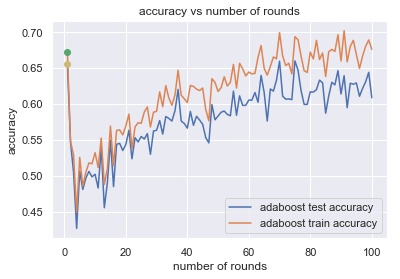

In [3]:
# Task 3

x = np.empty((100))
j = 1
while j<=100:
    x[j-1] = j
    j = j+1

plt.plot(x, accuracy_test, label="adaboost test accuracy")
plt.plot(x,accuracy_train,label="adaboost train accuracy")
plt.plot(1,acc_test,'yo')
plt.plot(1,acc_train,'go')
plt.xlabel('number of rounds')  
plt.ylabel('accuracy') 
  
# giving a title to my graph 
plt.title('accuracy vs number of rounds') 
plt.legend()
# function to show the plot 
plt.show() 

In [12]:
# The training_adaboost function
def training_adaboost(X_train,Y_train, num_rounds):
    m = X_train.shape[0]
    model_param = []
    alpha_values = []
    D = np.empty((m))
    D.fill(1/m)
    for t in range (num_rounds):
        clf = DecisionTreeClassifier(max_depth = 7)
        model = clf.fit(X_train, Y_train,sample_weight=D)
        ht = model.predict(X_train)
        err = 0 
        for j in range (m):
            if(ht[j]!=Y_train[j]):
                err = err +D[j]
        err = err/np.sum(D)
        alpha_t = math.log((1-err)/err) + math.log(6)
        alpha_values.append(alpha_t)
        model_param.append(model)
        for i in range (m):
            if(ht[i]!=Y_train[i]):
                D[i]=D[i]*math.exp(alpha_t)
        D = D/np.sum(D)
    return model_param, alpha_values

# testing_adaboost function
def testing_adaboost(adaboost_model, adaboost_alpha, X_test, Y_test=None):
    final_result = np.empty((X_test.shape[0],7))
    j = 0
    for model in adaboost_model:
        ht = model.predict_proba(X_test)
        final_result = final_result+(adaboost_alpha[j]*ht)
        j =j +1
    final_result1 = np.empty((X_test.shape[0],1))
    for i in range (final_result.shape[0]):
        sample = final_result[i]
        final_result1[i,0] = np.argmax(sample)+1
    return final_result1

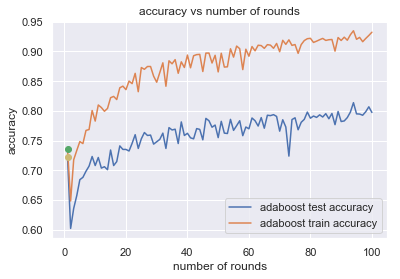

In [17]:
i = 1

while i<=100:
    param_model,param_alpha = training_adaboost(X_train,Y_train,i)
    ans_test = testing_adaboost(param_model,param_alpha,X_test,Y_test)
    accuracy_test[i-1] = metrics.accuracy_score(Y_test,ans_test)
    ans_train = testing_adaboost(param_model,param_alpha,X_train,Y_train)
    accuracy_train[i-1] = metrics.accuracy_score(Y_train,ans_train)
    i = i+1

x = np.empty((100))
j = 1
while j<=100:
    x[j-1] = j
    j = j+1

plt.plot(x, accuracy_test, label="adaboost test accuracy")
plt.plot(x,accuracy_train,label="adaboost train accuracy")
plt.plot(1,acc_test,'yo') #Test accuracy for single classifier
plt.plot(1,acc_train,'go') #Train accuracy for single classifier
plt.xlabel('number of rounds')  
plt.ylabel('accuracy')  
plt.title('accuracy vs number of rounds') 
plt.legend() 
plt.show() 

As we can see from the graphs above as the number of classifiers increase the accuracy gets better and better which is the strength of ensembel learning. It is used to get better accuracy than using a single classifier.
Also we can see boosted classifiers ultimately give better results than the single classifier. The single classifier is represented by the green and yellow dot on the graph above.

Using Adaboost for judge-no-labels data

In [18]:
judge_dataset = pd.read_csv("judge-no-labels.csv")
judge_dataset = judge_dataset.values
judge_dataset = np.delete(judge_dataset,0,1)
judge_dataset = scaler.transform(judge_dataset)

# Using library adaboost function to predict 

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 15),n_estimators=100,learning_rate=0.01,algorithm="SAMME.R")
adaboost.fit(X_train,Y_train)
submission = adaboost.predict(judge_dataset)

In [19]:
dataset_submit = pd.DataFrame({'Cover_Type':submission})
dataset_submit.to_csv('judge_predictions.csv', sep=',')

In [20]:
np.unique(submission)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [9]:
# Using the my own adaboost function to predict

param_model,param_alpha = training_adaboost(X_train,Y_train,100)
judge_ans = testing_adaboost(param_model,param_alpha,judge_dataset)

In [10]:
np.unique(judge_ans)

array([1., 2., 3., 4., 5., 6., 7.])

In [11]:
dataset_submit = pd.DataFrame({'Cover_Type':judge_ans[:,0]})
dataset_submit.to_csv('judge_predictions.csv', sep=',')